In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [4]:
fish_data=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\fish_market_data.csv')
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Shape & Size of the Data

In [5]:
fish_data.shape

(159, 7)

In [6]:
fish_data.size

1113

### Data type of each column

In [7]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Null value present in each column

In [8]:
fish_data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

**Data Set not contains any null values**

### Different species of fish in our data set

In [11]:
fish_data.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

**We have 7 different species of fish**

### Create data frame of numeric column

In [17]:
fish_numeric=pd.DataFrame(fish_data[['Weight','Length1','Length2','Length3','Height','Width']])
fish_numeric.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


### Statistical Measures

In [19]:
fish_numeric.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### Check Relation between columns

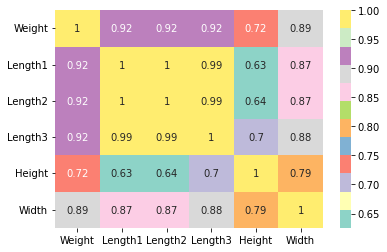

In [20]:
sns.heatmap(fish_numeric.corr(),annot=True, cmap='Set3');

**All the columns are highlt corelated**

### Species count of each species

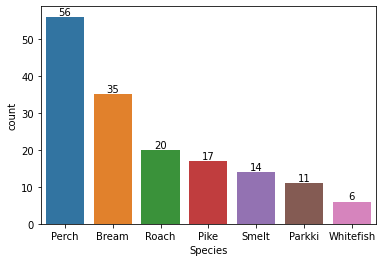

In [24]:
ax = sns.countplot(x='Species', data=fish_data,
                   order=fish_data['Species'].value_counts(ascending=False).index);

abs_values = fish_data['Species'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

### Seprate Data into dependent & independent variable

In [26]:
X, y=fish_numeric[['Length1','Length2','Length3','Height','Width']].values, fish_numeric['Weight'].values

In [28]:
print(X,y)

[[23.2    25.4    30.     11.52    4.02  ]
 [24.     26.3    31.2    12.48    4.3056]
 [23.9    26.5    31.1    12.3778  4.6961]
 [26.3    29.     33.5    12.73    4.4555]
 [26.5    29.     34.     12.444   5.134 ]
 [26.8    29.7    34.7    13.6024  4.9274]
 [26.8    29.7    34.5    14.1795  5.2785]
 [27.6    30.     35.     12.67    4.69  ]
 [27.6    30.     35.1    14.0049  4.8438]
 [28.5    30.7    36.2    14.2266  4.9594]
 [28.4    31.     36.2    14.2628  5.1042]
 [28.7    31.     36.2    14.3714  4.8146]
 [29.1    31.5    36.4    13.7592  4.368 ]
 [29.5    32.     37.3    13.9129  5.0728]
 [29.4    32.     37.2    14.9544  5.1708]
 [29.4    32.     37.2    15.438   5.58  ]
 [30.4    33.     38.3    14.8604  5.2854]
 [30.4    33.     38.5    14.938   5.1975]
 [30.9    33.5    38.6    15.633   5.1338]
 [31.     33.5    38.7    14.4738  5.7276]
 [31.3    34.     39.5    15.1285  5.5695]
 [31.4    34.     39.2    15.9936  5.3704]
 [31.5    34.5    39.7    15.5227  5.2801]
 [31.8    3

### Split the seperated data into traing and testing set

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 111 rows
Test Set: 48 rows


### Create model

In [32]:
from sklearn.linear_model import LinearRegression

In [34]:
model=LinearRegression()
model

LinearRegression()

### Fit linear regression model on training set

In [35]:
model = LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


In [36]:
prediction=model.predict(X_test)
prediction

array([ 462.90497642,  176.7979276 ,  226.624847  ,  185.66204549,
        663.31498685,  800.35992655,  698.15015636,  450.52257625,
        882.1062432 ,  138.18662597,  306.14863624,  596.63739669,
        785.29687654,  918.29800914,   69.98438462,  105.00233644,
        225.25222195,  941.17970226,  172.40409686,  679.40011753,
         66.30502518,  508.64832054,  172.09176289, 1054.17331406,
        134.45142278,  514.01132467,  643.02948483,  287.85528651,
        797.71587578, -125.85832562,  635.52727794,  179.51613396,
        941.17970226,  377.59707476,  601.23090444,  273.90610543,
        460.14928291,  614.80285734,  773.35332062,  169.39056693,
        654.11428742,    1.33844506,  246.12418127,  664.2837773 ,
        -50.0931483 ,  300.41566348,  302.53595321,  404.03922773])

In [37]:
y_test

array([ 390. ,    0. ,  170. ,  160. ,  556. ,  900. ,  800. ,  300. ,
        975. ,  115. ,  200. ,  456. , 1000. , 1000. ,   60. ,   78. ,
        145. , 1600. ,  130. ,  720. ,   55. ,  390. ,  120. , 1650. ,
         90. ,  450. ,  700. ,  270. ,  850. ,    9.7,  650. ,  110. ,
       1550. ,  300. ,  700. ,  225. ,  300. ,  620. ,  700. ,  135. ,
        514. ,   40. ,  145. ,  714. ,   19.7,  197. ,  180. ,  218. ])

**There is slight difference in predected one and original one**b

### Evaluate the model using test data

In [38]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
print("Training Accuracy", model.score(X_train, y_train))
print("Testing Accuracy", model.score(X_test, y_test))

MSE: 32509.60483618452
RMSE: 180.3042008278912
R2: 0.8136987517934335
Training Accuracy 0.9014261773086572
Testing Accuracy 0.8136987517934335


**Taining Accuracy is about 90% where as Testing Accuracy is around 81%**